<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/ClassicalBinaryAdder_Qiskit_Aer_mkbahk_20241105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python3 -m pip install qiskit[visualization]==1.2.4
#!python3 -m pip install qiskit-ionq
#!python3 -m pip install qiskit-ibmq-provider
!python3 -m pip install qiskit-aer==0.15.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=76a70bb7cd3c4e4b3201fb04efd61354a4939dfeddc13f233e1e0fa2f4387835
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 57.1 MB/s eta 0:00:00


In [ ]:
from qiskit import QuantumCircuit


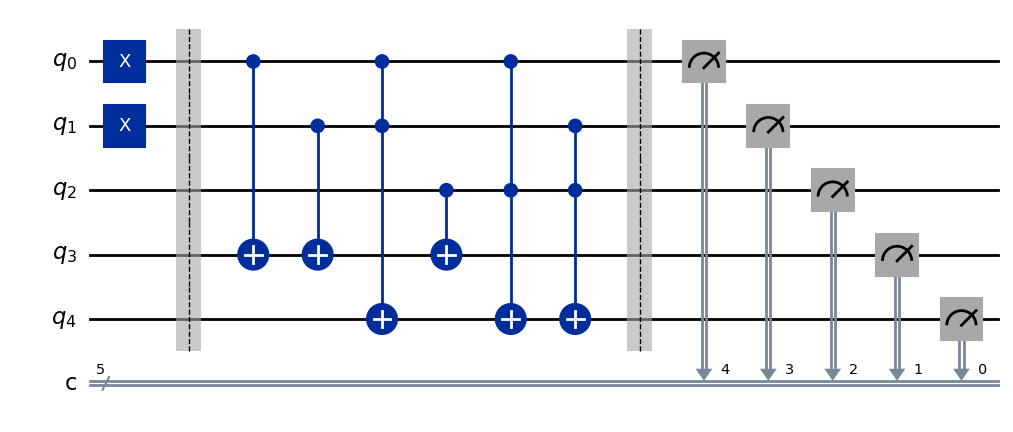

In [ ]:
# 양자 회로 생성
qc = QuantumCircuit(5, 5)  # 5개의 양자 비트와 2개의 클래식 비트를 사용합니다.

# 입력 비트 설정 (A=1, B=1)
qc.x(0)  # A 비트를 1로 설정
qc.x(1)  # B 비트를 1로 설정
qc.barrier()

# 전가산기 회로 구현
qc.cx(0, 3) # XOR 게이트 (A와 B의 논리합)
qc.cx(1, 3) # XOR 게이트 (A와 B의 논리합)
qc.ccx(0, 1, 4) # AND 게이트 (A와 B의 논리곱)
qc.cx(2, 3) # XOR 게이트 (A와 B의 논리합)
qc.ccx(0, 2, 4) # AND 게이트 (A와 B의 논리곱)
qc.ccx(1, 2, 4) # AND 게이트 (A와 B의 논리곱)
qc.barrier()

# 결과를 측정하여 Sum과 Carry 출력을 얻습니다.
qc.measure(0, 4)  # 큐비트를 클래식 비트 4에 매핑
qc.measure(1, 3)  # 큐비트를 클래식 비트 3에 매핑
qc.measure(2, 2)  # 보조비트를 클래식 비트 2에 매핑
qc.measure(3, 1)  # Sum(Result) 비트를 클래식 비트 1에 매핑
qc.measure(4, 0)  # Carry 비트를 클래식 비트 0에 매핑

qc.draw('mpl')

In [ ]:
from qiskit_aer import Aer
# 양자 시뮬레이터를 사용하여 회로 실행
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

# 결과 출력
print(counts)

{'11001': 1024}


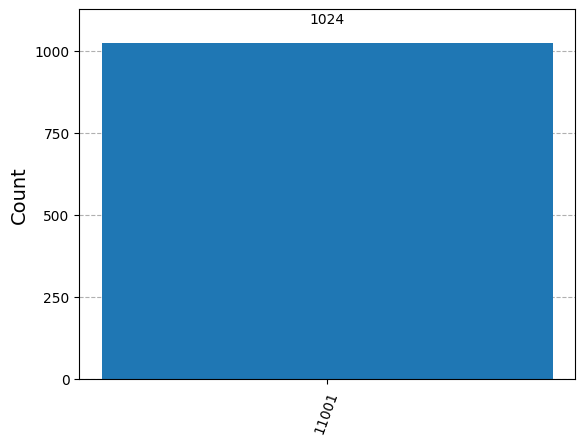

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(data=counts)